# **Дипломная работа** Вавиловой Инары


## Дипломный проект: "**Анализ розничной торговли**"

# Этапы проекта
1. Первичная обработка данных
2. Исследование данных
3. Разведывательный анализ данных
4. Гипотеза о данных:

Будут ли продажи больше или меньше на данной неделе, если ей предшествует праздничная неделя?
Увеличиваются ли продажи в обычные недели или в праздничные?
Являются ли продажи большими или меньшими по выходным или в будние дни?
Статистическая проверка одной из гипотез

Бизнес-задача состоит в том, чтобы проанализировать еженедельные продажи розничных магазинов в различных географических регионах и дать рекомендации по маркетинговой стратегии.

Импортируем сразу все необходимые библиотеки для нашего исследования

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
import os
from scipy import stats 
import math

1. Первичная обработка данных

Описание данных:

Файл "Stores"

Содержит данные, относящиеся к магазину.
- Store - номер магазина
- Type - тип магазина
- Size - размер магазина

Файл "Sales"


Содержит исторические данные о продажах, которые охватывают период с 2010-02-05 по 2012-11-01 годы.
- Store - номер магазина
- Dept - номер отдела
- Date - дата
- Weekly_Sales -  продажи для данного отдела в данном магазине
- IsHoliday - является ли эта неделя праздничной неделей

Файл "Features" 


Содержит данные, относящиеся к магазину, отделу и региональной деятельности за указанные даты.
- Store - номер магазина
- Date - дата
- Temperature - средняя температура в регионе
- Fuel_Price - стоимость топлива в регионе
- MarkDown1-5 - данные об уценке
- CPI - индекс потребительских цен
- Unemployment - уровень безработицы
- IsHoliday - является ли эта неделя праздничной неделей

In [2]:
df_stores= pd.read_csv('stores data-set.csv')
df_sales = pd.read_csv('sales data-set.csv')
df_features = pd.read_csv('features data set.csv')

In [3]:
df_stores.info('stores data-set.csv') #данные о магазинах
df_sales.info('sales data-set.csv') #данные о продажах
df_features.info('features data set.csv') #данные о характеристиках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        ---------

In [4]:
display(df_stores) #магазин/тип/размер

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [5]:
display(df_sales) #магазин/отдел/дата/Еженедельные распродажи/праздники

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [6]:
display(df_features)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


Датасет содержит исторические данные о продажах 45 магазинов, расположенных в разных регионах - каждый магазин имеет несколько отделов. Магазины проводят несколько рекламных мероприятий по уценке в течение года. Эти скидки предшествуют важным праздникам. Недели, включающие эти праздничные дни, оцениваются в пять раз выше, чем недели, не связанные с праздниками.

2. Исследование данных

2.1. Недопустимые значения.
Проверим, какие столбцы содержат пустые, нулевые, отрицательные значения или неправильные типы данных (например, строки вместо чисел).

In [7]:
print(df_stores.dtypes)

Store     int64
Type     object
Size      int64
dtype: object


In [8]:
print(df_sales.dtypes)

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object


In [9]:
print(df_features.dtypes)

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object


In [10]:
#Даты интерпретируются как "объект", преобразуем их в тип данных datetime с форматом год-месяц-день
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
df_sales

C:\Users\Инара\AppData\Local\Temp\ipykernel_22268\1262453340.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_sales['Date'] = pd.to_datetime(df_sales['Date'])


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-05-10,628.10,False
421567,45,98,2012-12-10,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [11]:
df_features['Date'] = pd.to_datetime(df_features['Date'])
df_features

C:\Users\Инара\AppData\Local\Temp\ipykernel_22268\2807774963.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_features['Date'] = pd.to_datetime(df_features['Date'])


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-05-07,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-12-07,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [12]:
#мы не планируем анализировать уценку, поэтому данные столбцы удаляем
df_features = df_features.drop(columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5'],axis = 1)

In [13]:
#преобразуем значения True/False в 1/0
holidays_factor, types =df_features['IsHoliday'].factorize()
df_features['IsHoliday'] = holidays_factor


Проверим пропущенные значения в наших данных

In [14]:
df_stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [15]:
df_sales.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [16]:
df_features.isna().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
CPI             585
Unemployment    585
IsHoliday         0
dtype: int64

Наши файлы с данными о магазинах и с данными о продажах не имеют пропущенных значений. Однако в файле данных features есть строки с неполными значениями. Поскольку мы не планируем проверять индекс потребительских цен и уровень безработицы, с данными столбцами никаких манипуляций проводить не будем. 


Поверим данные в файлах на отрицательные и нулевые значения.

In [17]:
df_features.describe()

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
count,8190.000000,8190.000000,8190.000000,7605.000000,7605.000000,8190.000000
mean,23.000000,59.356198,3.405992,172.460809,7.826821,0.071429
std,12.987966,18.678607,0.431337,39.738346,1.877259,0.257555
min,1.000000,-7.290000,2.472000,126.064000,3.684000,0.000000
25%,12.000000,45.902500,3.041000,132.364839,6.634000,0.000000
50%,23.000000,60.710000,3.513000,182.764003,7.806000,0.000000
75%,34.000000,73.880000,3.743000,213.932412,8.567000,0.000000
max,45.000000,101.950000,4.468000,228.976456,14.313000,1.000000


In [18]:
df_sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [19]:
print(df_sales[df_sales['Weekly_Sales'] == 0].shape[0])

73


In [20]:
print(df_sales[df_sales['Weekly_Sales'] < 0].shape[0])

1285


В файле sales есть 1285 строк, где продажи отрицательные, и 73, где они равны нулю. Можем предположить что отрицательные строки могут свидетельствовать о наличии возвратов, а нулевые с отсутствием продаж.

In [21]:
df_stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


Для дальнейшего анализа мы обьединяем файлы sales и stories в один.

In [22]:
sales_stores = pd.merge(df_stores, df_sales, on=['Store'], how='outer')
sales_stores

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
0,1,A,151315,1,2010-05-02,24924.50,False
1,1,A,151315,1,2010-12-02,46039.49,True
2,1,A,151315,1,2010-02-19,41595.55,False
3,1,A,151315,1,2010-02-26,19403.54,False
4,1,A,151315,1,2010-05-03,21827.90,False
...,...,...,...,...,...,...,...
421565,45,B,118221,98,2012-09-28,508.37,False
421566,45,B,118221,98,2012-05-10,628.10,False
421567,45,B,118221,98,2012-12-10,1061.02,False
421568,45,B,118221,98,2012-10-19,760.01,False


In [27]:
letters = ['A', 'B', 'C']
depts = dict()
for l in letters:
    d = sales_stores[sales_stores['Type'] == l]
    d = d.Dept.unique()
    d.sort()
    print('\nЕсть {0} уникальных отделов в магазинах типа {1}.'.format(len(d), l))
    print(d)
    depts[l]= d

def notintersection(list1, list2):
    list3 = [x for x in list1 if x not in list2]
    return list3
    
print('\nОтделы, которые могут существовать в A, но не в B: {0}'.format(notintersection(depts['A'], depts['B'])))
print('\nОтделы, которые могут существовать в B, но не в C: {0}'.format(notintersection(depts['B'], depts['C'])))


Есть 81 уникальных отделов в магазинах типа A.
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 54 55 56 58 59 60 65 67 71 72 74 77 78 79 80 81 82 83 85 87 90
 91 92 93 94 95 96 97 98 99]

Есть 80 уникальных отделов в магазинах типа B.
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91
 92 93 94 95 96 97 98 99]

Есть 66 уникальных отделов в магазинах типа C.
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 31 32 33 34 35 38 40 41 42 44 46 49 52 55 56 59 60 67 71 72
 74 79 80 81 82 83 85 87 90 91 92 93 94 95 96 97 98 99]

Отделы, которые могут существовать в A, но не в B: [65]

Отделы, которые могут существовать в B, но не в C: [30, 36, 37, 39, 43, 45, 47, 48, 50, 51, 54, 58, 77,

Магазины типов "А" и "В" содержат практически одинаковое количество отделов, в то время как магазины типа "С" содержать на 15 или 14 отделов меньше, соответственно. 
Если бы у нас были данные о продажах по отделам, можно было бы провести дополнительный анализ, но продажи по отделам отсутствуют.
Также возможно, что не все отделы в одном типе содержат одинаковое количество отделов. Тогда можно было бы определить, существует ли корреляция между количеством отделов в магазине и еженедельными продажами в нем или его размером.

2.2. Анализ еженедельных продаж по магазинам

In [28]:
#рассмотрим еженедельные распродажи
#основные статистические данные
weekly_series = pd.DataFrame(sales_stores['Weekly_Sales'])
weekly_series.describe()

,Weekly_Sales
count,421570.000000
mean,15981.258123
std,22711.183519
min,-4988.940000
25%,2079.650000
50%,7612.030000
75%,20205.852500
max,693099.360000


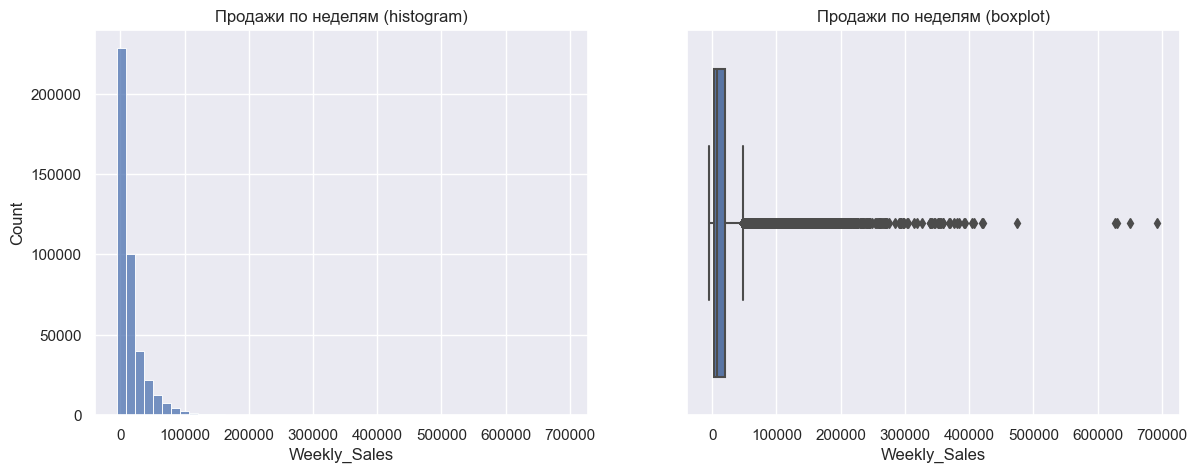

In [31]:
sns.set(style='darkgrid')
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(14,5))
g= sns.histplot(weekly_series, x='Weekly_Sales', bins=50, ax=ax1).set(title='Продажи по неделям (histogram)')
g= sns.boxplot(x=weekly_series["Weekly_Sales"], ax=ax2).set(title='Продажи по неделям (boxplot)')

Ранее мы выяснили что существуют магазины у которых есть продажи с отрицательными и нулевыми значениями. Здесь мы видим небольшое количество магазинов, где продажи необычайно высоки. Посмотрим сколько их всего.

In [32]:
count, division = np.histogram(sales_stores['Weekly_Sales'], bins=50)
out, bins = pd.cut(sales_stores['Weekly_Sales'], bins=division, include_lowest=True, right=True, retbins=True)
counts = out.value_counts().head(35) # исключаем 15 пустых ячеек

def gen_cumulative(counts_df):
    total = sum(counts_df.values)
    counts_df = pd.DataFrame(data={'Intervals': counts_df.index.to_list(), 'Count': counts_df.values})
    counts_df['Cumulative Count'] = counts_df['Count'].cumsum()/total
    counts_df['Remainder'] = 1 - counts_df['Cumulative Count']
    counts_df['Percentage'] = counts_df['Count']/total
    
    counts_df['Count'] = pd.Series(["{0:,}".format(round(val, 2)) for val in counts_df['Count']], index = counts_df.index)
    for c in ['Cumulative Count', 'Remainder', 'Percentage']:
        counts_df[c] = pd.Series(["{0:.2f}%".format(val * 100) for val in counts_df[c]], index = counts_df.index)
    return counts_df
    
counts = gen_cumulative(counts)
counts

,Intervals,Count,Cumulative Count,Remainder,Percentage
0,"(-4988.941, 8972.826]","228,240",54.14%,45.86%,54.14%
1,"(8972.826, 22934.592]","100,440",77.97%,22.03%,23.83%
2,"(22934.592, 36896.358]","39,914",87.43%,12.57%,9.47%
3,"(36896.358, 50858.124]","21,844",92.62%,7.38%,5.18%
4,"(50858.124, 64819.89]","12,686",95.62%,4.38%,3.01%
5,"(64819.89, 78781.656]","7,559",97.42%,2.58%,1.79%
6,"(78781.656, 92743.422]","4,332",98.45%,1.55%,1.03%
7,"(92743.422, 106705.188]","2,365",99.01%,0.99%,0.56%
8,"(106705.188, 120666.954]","1,496",99.36%,0.64%,0.35%
9,"(120666.954, 134628.72]",818,99.55%,0.45%,0.19%


3. Разведывательный анализ данных

3.1. Динамика цен на топливо, индекса потребительских цен, безработицы и еженедельных продаж во всех магазинах

In [33]:
def calc_min_max_avg (df, var, sortby='Date', dropped_columns=[]):
    df_agg = df.copy().drop(columns = dropped_columns)
    df_agg = df_agg.sort_values(by=sortby).reset_index().drop(columns = ['index'])
    df_agg[var+'_Min'] = df_agg.groupby(sortby)[var].transform(min)
    df_agg[var+'_Max'] = df_agg.groupby(sortby)[var].transform(max)
    q25, q50, q75 = [df_agg.groupby(sortby)[var].quantile([q]).transpose().values.tolist() for q in [.25, .50, .75]]
    df_agg = df_agg.drop(columns = [var]).drop_duplicates().reset_index().drop(columns = ['index'])
    df_agg[var+'_q25'], df_agg[var+'_q50'], df_agg[var+'_q75'] = q25, q50, q75
    return df_agg
features_agg = calc_min_max_avg(df_features, 
                                'Fuel_Price', 
                                'Date', 
                                ['Temperature', 'Store', 'CPI', 'Unemployment'])
features_agg2 = calc_min_max_avg(df_features, 
                                'CPI', 
                                'Date', 
                                ['Temperature', 'Store','Fuel_Price', 'Unemployment'])
features_agg3 = calc_min_max_avg(df_features, 
                                'Unemployment', 
                                'Date', 
                                ['Temperature', 'Store', 'Fuel_Price', 'CPI'])
sales_agg = calc_min_max_avg(df_sales, 
                             'Weekly_Sales', 
                             'Date', 
                             ['Store', 'Dept'])

In [34]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
    
def plot_min_max_avg (df, var, sortby='Date', title='', mode='all'):
    x = df[sortby]
    series = list()
    if mode == 'all':
        series.append(go.Scatter(x=x, y=df[var+'_Min'], name = "Min", line = dict(color = 'green'), opacity = 0.4))
        series.append(go.Scatter(x=x, y=df[var+'_q25'], name = "q25", line = dict(color = 'blue'), opacity = 0.4))
        series.append(go.Scatter(x=x, y=df[var+'_q50'], name = "q50", line = dict(color = 'blue'), opacity = 0.4))
        series.append(go.Scatter(x=x, y=df[var+'_q75'], name = "q75", line = dict(color = 'blue'), opacity = 0.4))
        series.append(go.Scatter(x=x, y=df[var+'_Max'], name = "Max", line = dict(color = 'red'), opacity = 0.4))
        layout = dict(title='Min, Mean, and Max of '+var+'{0}'.format(title))
    elif mode == 'mean':
        series.append(go.Scatter(x=x, y=df[var+'_q50'], name = "q50", line = dict(color = 'blue'), opacity = 0.4))
        layout = dict(title='Mean of '+var+'{0}'.format(title))
    fig = dict(data=series, layout=layout)
    iplot(fig)

In [35]:
plot_min_max_avg (features_agg, 'Fuel_Price')#цена на топливо

In [36]:
plot_min_max_avg (features_agg2, 'CPI')

In [37]:
plot_min_max_avg (features_agg3, 'Unemployment')#безработица

In [38]:
plot_min_max_avg (sales_agg, 'Weekly_Sales')#еженедельные продажи

Из получившихся у нас графиков мы можем сделать следующие выводы:
- Колебания цен на топливо одинаковы во всех магазинах. 
- Нет никакой связи между еженедельными продажами и ценами на топливо.
- Индекс потребительских цен растет при повышении цен на топливо, поскольку, скорее всего, цена на топливо является исходной величиной для расчета индекса потребительских цен. 
- Нет никакой связи между безработицей и еженедельными продажами.
- В магазинах с высокими продажами пик продаж пришелся на январь 2011 и 2012 годов.

4. Гипотезы о наших данных

Будут ли продажи больше или меньше на данной неделе, если ей предшествует праздничная неделя?
Увеличиваются ли продажи в обычные недели или в праздничные?
Являются ли продажи большими или меньшими по выходным или в будние дни?
Статистическая проверка одной из гипотез


In [39]:
sales_agg_holiday = sales_agg[sales_agg['IsHoliday'] == True]
sales_agg_notholiday = sales_agg[sales_agg['IsHoliday'] == False]

In [40]:
plot_min_max_avg (sales_agg_holiday, 'Weekly_Sales')

In [41]:
plot_min_max_avg (sales_agg_notholiday, 'Weekly_Sales')

К сожалению по данным графикам невозможно провести статестический анализ, так как только 10 недель помечаны как праздничные.
По этой причине мы попробуем другую гипотезу: будут ли средние продажи магазинов типа "А" больше, чем в магазинах типа "С".

In [42]:
sales_stores

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
0,1,A,151315,1,2010-05-02,24924.50,False
1,1,A,151315,1,2010-12-02,46039.49,True
2,1,A,151315,1,2010-02-19,41595.55,False
3,1,A,151315,1,2010-02-26,19403.54,False
4,1,A,151315,1,2010-05-03,21827.90,False
...,...,...,...,...,...,...,...
421565,45,B,118221,98,2012-09-28,508.37,False
421566,45,B,118221,98,2012-05-10,628.10,False
421567,45,B,118221,98,2012-12-10,1061.02,False
421568,45,B,118221,98,2012-10-19,760.01,False


In [43]:
df_sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-05-10,628.10,False
421567,45,98,2012-12-10,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [44]:
sales_agg = calc_min_max_avg(sales_stores, 
                             'Weekly_Sales', 
                             'Date', 
                             ['Store', 'Dept', 'Type', 'Size', 'IsHoliday'])
sales_agg

,Date,Weekly_Sales_Min,Weekly_Sales_Max,Weekly_Sales_q25,Weekly_Sales_q50,Weekly_Sales_q75
0,2010-01-10,-103.00,174219.51,2057.205,6940.74,18007.8500
1,2010-02-04,-224.00,203457.42,2443.370,8658.89,21876.5800
2,2010-02-07,-175.54,198349.17,2315.380,8117.29,22019.2500
3,2010-02-19,-863.00,192282.19,2193.340,8411.25,20576.0300
4,2010-02-26,-1750.00,205250.96,1847.595,7235.80,18104.7200
...,...,...,...,...,...,...
138,2012-10-08,-139.65,194032.48,1846.660,7557.50,20400.8800
139,2012-10-19,-22.92,184451.36,2095.310,7374.70,19304.9575
140,2012-10-26,-178.15,183483.92,2114.365,7547.23,20052.9600
141,2012-11-05,-548.00,194034.68,2074.150,7533.42,20411.1800


In [45]:
# Разделим по типу магазина, продажи, объединенные с типом магазина
letters = ['A', 'B', 'C']
sales_stores_bytype = dict()
for l in letters:
    t = sales_stores[sales_stores['Type'] == l]
    t_agg = calc_min_max_avg(t, 'Weekly_Sales', 'Date', ['Store', 'Dept', 'Size', 'IsHoliday'])
    sales_stores_bytype[l]= t_agg

In [46]:
plot_min_max_avg (sales_stores_bytype['A'], 'Weekly_Sales', 'Date', ' (A Stores) ', 'mean')

In [47]:
plot_min_max_avg (sales_stores_bytype['B'], 'Weekly_Sales', 'Date', ' (B Stores)', 'mean')

In [48]:
plot_min_max_avg (sales_stores_bytype['C'], 'Weekly_Sales', 'Date', ' (C Stores)', 'mean')

Средние значения для всех трех типов магазинов различны. Мы применим логарифмическое преобразование, для дальнейшего анализа.

In [49]:
sales_stores_transformed = sales_stores.copy()
sales_stores_transformed['Weekly_Sales'] = sales_stores_transformed['Weekly_Sales'].apply(np.log1p)

sales_stores_bytype_transformed = dict()
for l in letters:
    t = sales_stores_transformed[sales_stores_transformed['Type'] == l]
    t_agg = calc_min_max_avg(t, 'Weekly_Sales', 'Date', ['Store', 'Dept', 'Size', 'IsHoliday'])
    sales_stores_bytype_transformed[l]= t_agg
    display(sales_stores_bytype_transformed[l]) 

,Type,Date,Weekly_Sales_Min,Weekly_Sales_Max,Weekly_Sales_q25,Weekly_Sales_q50,Weekly_Sales_q75
0,A,2010-01-10,0.693147,12.068077,8.129423,9.103642,10.061908
1,A,2010-02-04,0.000000,12.223217,8.272297,9.367170,10.258955
2,A,2010-02-07,0.009950,12.197789,8.211468,9.234881,10.272095
3,A,2010-02-19,0.009950,12.166725,8.190316,9.342410,10.165029
4,A,2010-02-26,-inf,12.231994,8.046148,9.191916,10.077852
...,...,...,...,...,...,...,...
138,A,2012-10-08,0.009950,12.175786,8.103951,9.221492,10.199423
139,A,2012-10-19,0.029559,12.125146,8.122253,9.200437,10.117139
140,A,2012-10-26,0.009950,12.119888,8.116454,9.207276,10.148042
141,A,2012-11-05,-0.510826,12.175797,8.104761,9.221259,10.200205


,Type,Date,Weekly_Sales_Min,Weekly_Sales_Max,Weekly_Sales_q25,Weekly_Sales_q50,Weekly_Sales_q75
0,B,2010-01-10,0.000000,11.764970,7.557107,8.629761,9.507306
1,B,2010-02-04,0.683097,11.841642,7.775058,8.856003,9.757410
2,B,2010-02-07,-inf,11.806738,7.652633,8.808220,9.736885
3,B,2010-02-19,-0.314711,12.128019,7.613671,8.756038,9.672598
4,B,2010-02-26,0.000000,12.133520,7.408608,8.651462,9.561603
...,...,...,...,...,...,...,...
138,B,2012-10-08,-2.659260,11.630925,7.527105,8.747711,9.641347
139,B,2012-10-19,0.693147,11.619510,7.575775,8.668830,9.591225
140,B,2012-10-26,0.693147,11.704602,7.644995,8.687635,9.633891
141,B,2012-11-05,0.095310,11.589256,7.661799,8.740851,9.621659


,Type,Date,Weekly_Sales_Min,Weekly_Sales_Max,Weekly_Sales_q25,Weekly_Sales_q50,Weekly_Sales_q75
0,C,2010-01-10,1.098612,11.353416,4.833739,6.935370,9.473478
1,C,2010-02-04,0.378436,11.416032,5.157558,7.416553,9.520657
2,C,2010-02-07,1.791759,11.299407,5.210305,7.338323,9.512796
3,C,2010-02-19,1.386294,11.442188,5.087374,7.275339,9.496012
4,C,2010-02-26,1.381282,11.337788,5.081404,7.150835,9.504291
...,...,...,...,...,...,...,...
138,C,2012-10-08,0.688135,11.439349,4.516448,6.948369,9.385599
139,C,2012-10-19,0.506818,11.343200,4.616223,6.827608,9.406245
140,C,2012-10-26,0.322083,11.225402,4.541804,6.871174,9.461996
141,C,2012-11-05,0.625938,11.529181,4.939626,7.064520,9.436203


In [50]:
for l in letters:
    sales_stores_bytype_transformed[l].replace([np.inf, -np.inf], np.nan, inplace=True)
    sales_stores_bytype_transformed[l] = sales_stores_bytype_transformed[l].dropna(subset=['Weekly_Sales_Min'])

In [51]:
plot_min_max_avg (sales_stores_bytype_transformed['A'], 'Weekly_Sales', 'Date', ' (A Stores) ')

In [52]:
plot_min_max_avg (sales_stores_bytype_transformed['B'], 'Weekly_Sales', 'Date', ' (B Stores) ')

In [53]:
plot_min_max_avg (sales_stores_bytype_transformed['C'], 'Weekly_Sales', 'Date', ' (C Stores) ')

Теперь, когда мы применили логарифмическое преобразование и удалили недопустимые значения, различия между типами стали более заметными. С помощью гистограмм различия будут более заметны.

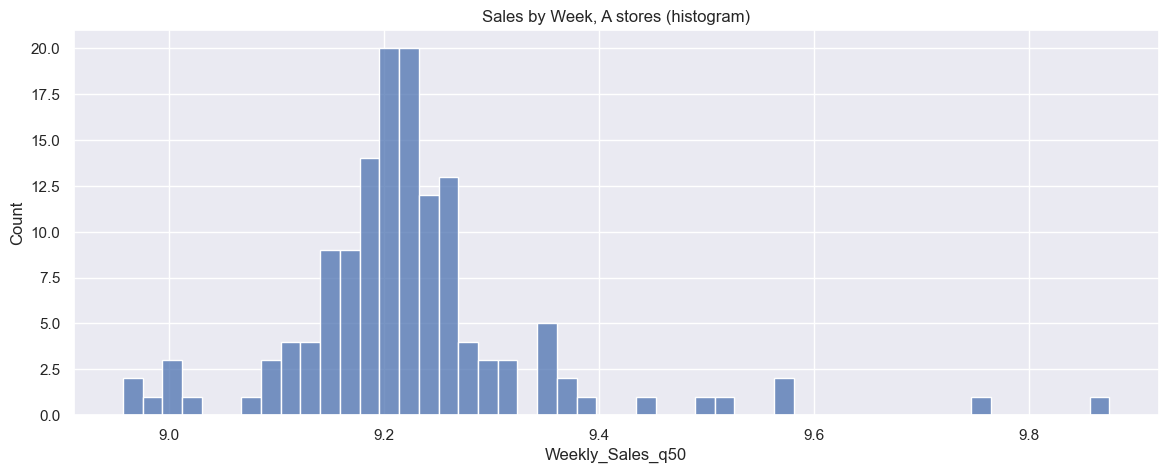

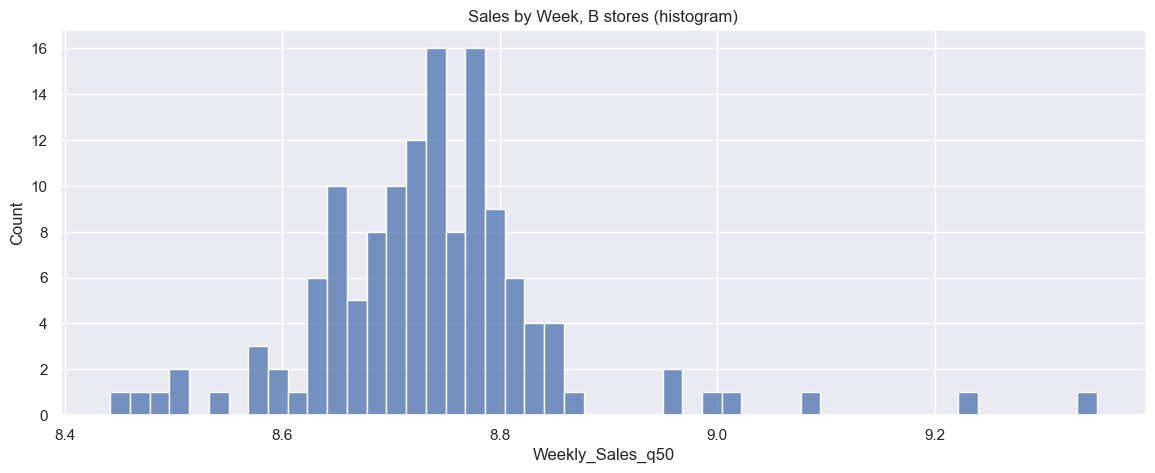

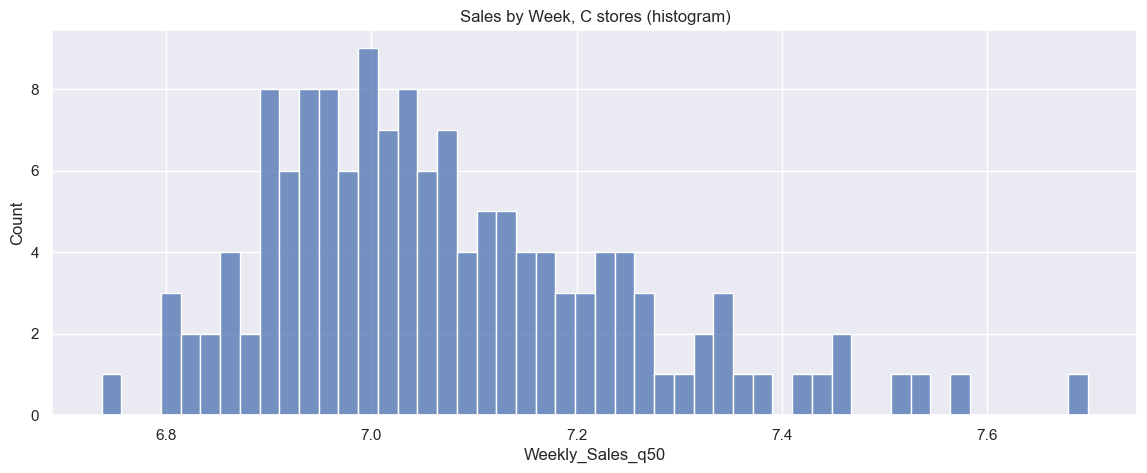

In [50]:
sns.set(style='darkgrid')

fig, ax1 = plt.subplots(ncols=1, sharey=False, figsize=(14,5))
weekly_series = pd.DataFrame(sales_stores_bytype_transformed['A']['Weekly_Sales_q50'])
g= sns.histplot(weekly_series, x='Weekly_Sales_q50', bins=50, ax=ax1).set(title='Sales by Week, A stores (histogram)')

fig, ax2 = plt.subplots(ncols=1, sharey=False, figsize=(14,5))
weekly_series = pd.DataFrame(sales_stores_bytype_transformed['B']['Weekly_Sales_q50'])
g= sns.histplot(weekly_series, x='Weekly_Sales_q50', bins=50, ax=ax2).set(title='Sales by Week, B stores (histogram)')

fig, ax3 = plt.subplots(ncols=1, sharey=False, figsize=(14,5))
weekly_series = pd.DataFrame(sales_stores_bytype_transformed['C']['Weekly_Sales_q50'])
g= sns.histplot(weekly_series, x='Weekly_Sales_q50', bins=50, ax=ax3).set(title='Sales by Week, C stores (histogram)')

In [54]:
n=10
a = pd.DataFrame(sales_stores_bytype_transformed['A']['Weekly_Sales_q50']).sample(n=n, random_state=1)
b = pd.DataFrame(sales_stores_bytype_transformed['B']['Weekly_Sales_q50']).sample(n=n, random_state=1)
c = pd.DataFrame(sales_stores_bytype_transformed['C']['Weekly_Sales_q50']).sample(n=n, random_state=1)

print('\nВыборка средних значений за неделю в A:', len(a))
print(a.values.tolist())
print('\nВыборка средних значений за неделю в B:', len(b))
print(b.values.tolist())
print('\nВыборка средних значений за неделю в C:', len(c))
print(c.values.tolist())

ttest,pval = stats.ttest_rel(a, b)
print('\npval for A and B:',pval)
if pval < 0.05: print('Опровергаем нулевую гипотезу')
else: print('Принимаем нулевую гипотезу')
    
ttest,pval = stats.ttest_rel(a, c)
print('\npval for A and B:',pval)
if pval < 0.05: print('Опровергаем нулевую гипотезу')
else: print('Принимаем нулевую гипотезу')
    
ttest,pval = stats.ttest_rel(b, c)
print('\npval for A and B:',pval)
if pval < 0.05: print('Опровергаем нулевую гипотезу')
else: print('Принимаем нулевую гипотезу')


Выборка средних значений за неделю в A: 10
[[9.212659680300092], [9.254600307560246], [9.116008237955771], [9.281025521440299], [9.17611520193164], [9.097828045644192], [9.21121998500319], [9.874662061356293], [9.162708613923387], [9.271356387293178]]

Выборка средних значений за неделю в B: 10
[[9.348984223831103], [8.689058606122753], [8.773434028306387], [8.784893941426732], [8.826275144287765], [8.682604234718205], [8.709391334870233], [8.787796492538298], [8.70838528837838], [8.725367662999295]]

Выборка средних значений за неделю в C: 10
[[6.898073556428738], [6.835216843691538], [7.456945480291113], [7.129615454731795], [6.9912320833899555], [7.370937335510792], [7.17859124930683], [7.278335809874856], [7.169688681411141], [7.003519900966516]]

pval for A and B: [0.000838]
Опровергаем нулевую гипотезу

pval for A and B: [2.561526e-09]
Опровергаем нулевую гипотезу

pval for A and B: [6.61055053e-08]
Опровергаем нулевую гипотезу


По проведенному анализу данных можем сказать что, данные в файлах в целом пригодны для анализа, за исключением столбцов с уценками которые не объясняются, а так же отрицательные продажи, которые как мы предположили могут быть возвратными. 
Для принития каких то бизнес решений необходимы более расширенные данные. К примеру набор данных, разделенный по дням недели и часам, позволил бы принимать кадровые и ценовые решения. В периоды, когда продажи выше, нам потребуется больше сотрудников. Данные которые разделены по отделам, могли бы позволить принять решения о том, какие отделы нуждаются в большем количестве рекламных акций или скидок, когда рост продаж снижается.
